# Отчет

Исходный код отчета (Python) на GitHub: [линк](https://github.com/Filareth2015/Tasks/blob/master/Reklama%20-%20Case%201.ipynb)

## 1. Общая информация о данных

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

%pylab inline

data = pd.read_excel('PLAYKOT_GDA.xlsx')

print 'Отчет описывает период с {} по {}'.format((data.values[:, 1].min()).date(), (data.values[:, 2].max()).date())
print 'Количество уникальных пользователей за период:', len(np.unique(data.values[:, 0]))
print 'Всего осуществлено пользователями платежей за период, руб:', sum(data.values[:, 10])

Populating the interactive namespace from numpy and matplotlib
Отчет описывает период с 2013-04-11 по 2013-07-22
Количество уникальных пользователей за период: 33863
Всего осуществлено пользователями платежей за период, руб: 4118626


## 2. Инфографика

### Влияние пола

In [2]:
# Data to plots
labels = u'Мужчины', u'Женщины', u'Пол не указан'
sizes = [len(data[data[u'Пол'] == 'male']), len(data[data[u'Пол'] == 'female']), len(data[data[u'Пол'].isnull()])]
colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode = (0.1, 0, 0)  

data['ProfitFromFirstWeek'] = pd.Series(data.values[:, 6])
TotalProfitFromFirstWeek = sum(data['ProfitFromFirstWeek'])
MaleProfitFromFirstWeek = sum(data[data[u'Пол'] == 'male'].ProfitFromFirstWeek.values)
FemaleProfitFromFirstWeek = sum(data[data[u'Пол'] == 'female'].ProfitFromFirstWeek.values)

data['ProfitFromSecondWeek'] = pd.Series(data.values[:, 7] - data.values[:, 6])
TotalProfitFromSecondWeek = sum(data['ProfitFromSecondWeek'])
MaleProfitFromSecondWeek = sum(data[data[u'Пол'] == 'male'].ProfitFromSecondWeek.values) 
FemaleProfitFromSecondWeek = sum(data[data[u'Пол'] == 'female'].ProfitFromSecondWeek.values)

data['ProfitFromThirdAndFourthWeeks'] = pd.Series(data.values[:, 8] - data.values[:, 7])
TotalProfitFromThirdAndFourthWeeks = sum(data['ProfitFromThirdAndFourthWeeks'])
MaleProfitFromThirdAndFourthWeeks = sum(data[data[u'Пол'] == 'male'].ProfitFromThirdAndFourthWeeks.values) 
FemaleProfitFromThirdAndFourthWeeks = sum(data[data[u'Пол'] == 'female'].ProfitFromThirdAndFourthWeeks.values)

data['ProfitFromSecondMonth'] = pd.Series(data.values[:, 9] - data.values[:, 8])
TotalProfitFromSecondMonth = sum(data['ProfitFromSecondMonth'])
MaleProfitFromSecondMonth = sum(data[data[u'Пол'] == 'male'].ProfitFromSecondMonth.values)
FemaleProfitFromSecondMonth = sum(data[data[u'Пол'] == 'female'].ProfitFromSecondMonth.values)

data['ProfitFromThirdMonth'] = pd.Series(data.values[:, 10] - data.values[:, 9])
TotalProfitFromThirdMonth = sum(data['ProfitFromThirdMonth'])
MaleProfitFromThirdMonth = sum(data[data[u'Пол'] == 'male'].ProfitFromThirdMonth.values)
FemaleProfitFromThirdMonth = sum(data[data[u'Пол'] == 'female'].ProfitFromThirdMonth.values)

N = 5
total = (TotalProfitFromFirstWeek, TotalProfitFromSecondWeek, TotalProfitFromThirdAndFourthWeeks, TotalProfitFromSecondMonth, TotalProfitFromThirdMonth)
men = (MaleProfitFromFirstWeek, MaleProfitFromSecondWeek, MaleProfitFromThirdAndFourthWeeks, MaleProfitFromSecondMonth, MaleProfitFromThirdMonth)
women = (FemaleProfitFromFirstWeek, FemaleProfitFromSecondWeek, FemaleProfitFromThirdAndFourthWeeks, FemaleProfitFromSecondMonth, FemaleProfitFromThirdMonth)

ind = np.arange(N)    
width = 0.35       


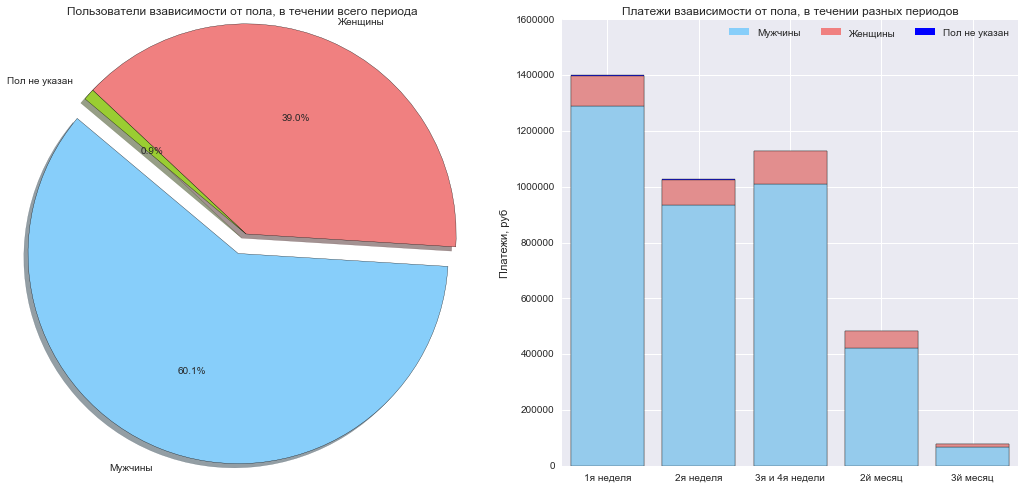

In [3]:
# Plots
plt.figure(figsize(18,8))

pylab.subplot(1,2,1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(u'Пользователи взависимости от пола, в течении всего периода')

pylab.subplot(1,2,2)

sns.set_style("white")

sns.barplot(x = ind, y = total, color = "blue")
sns.barplot(x = ind, y = men, color = "lightskyblue")
sns.barplot(x = ind, y = women, color = "lightcoral", bottom=men)

bar1 = plt.Rectangle((0,0),1,1,fc="lightskyblue", edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')
bar3 = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
l = plt.legend([bar1, bar2, bar3], [u'Мужчины', u'Женщины', u'Пол не указан'], loc=1, ncol = 3, prop={'size':10})
plt.title(u'Платежи взависимости от пола, в течении разных периодов')
plt.xticks(ind, (u'1я неделя', u'2я неделя', u'3я и 4я недели', u'2й месяц', u'3й месяц'))
plt.ylabel(u'Платежи, руб')
plt.grid(True)
l.draw_frame(False)


### Влияние возраста

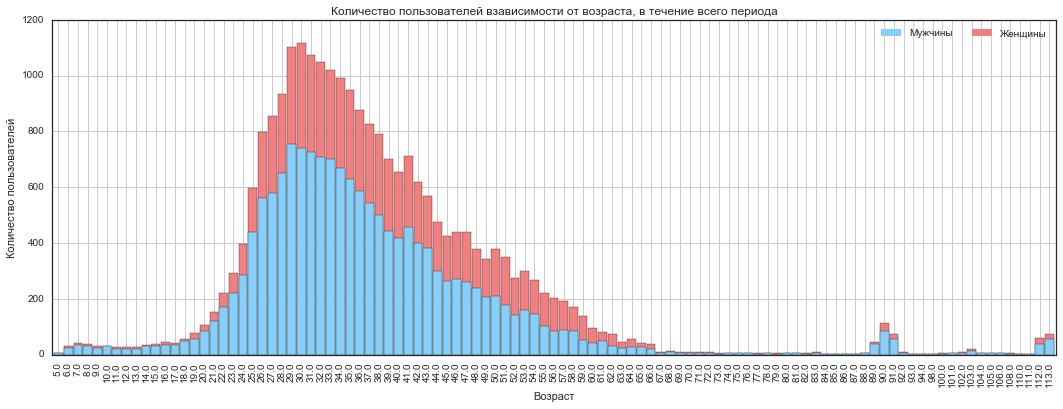

In [4]:
plt.figure(figsize(18,6))

bar1 = plt.Rectangle((0,0),1,1,fc="lightskyblue", edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')

data.groupby(u'Возраст')[u'Возраст'].agg(lambda x: len(x)).plot(kind='bar', width=0.9, color = "lightcoral")
data[data[u'Пол'] == 'male'].groupby(u'Возраст')[u'Возраст'].agg(lambda x: len(x)).plot(kind='bar', width=0.9, color = "lightskyblue")
l = plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.title(u'Количество пользователей взависимости от возраста, в течение всего периода')
plt.ylabel(u'Количество пользователей')
plt.grid(True)

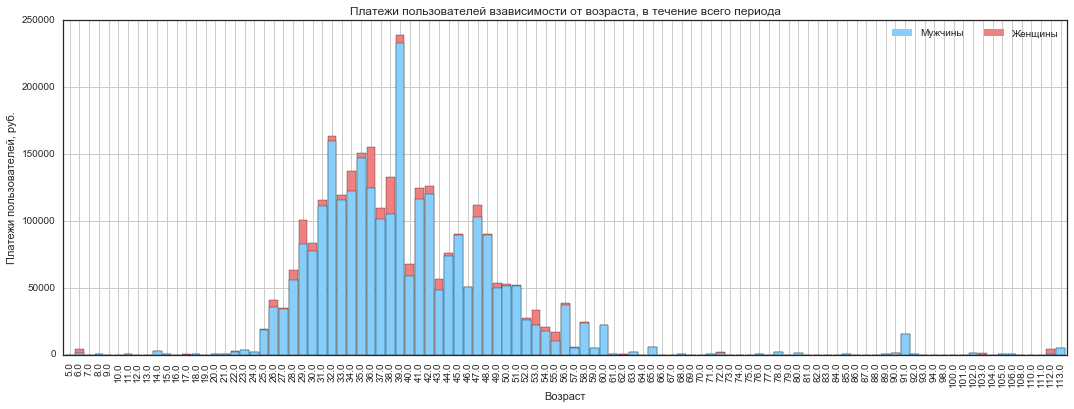

In [5]:
plt.figure(figsize(18,6))

bar1 = plt.Rectangle((0,0),1,1,fc="lightskyblue", edgecolor = 'none')
bar2 = plt.Rectangle((0,0),1,1,fc='lightcoral',  edgecolor = 'none')

data.groupby(u'Возраст')[u'Всего платежей (руб.)'].agg(np.sum).plot(kind='bar', width=0.9, color = "lightcoral")
data[data[u'Пол'] == 'male'].groupby(u'Возраст')[u'Всего платежей (руб.)'].agg(np.sum).plot(kind='bar', width=0.9, color = "lightskyblue")
l = plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.title(u'Платежи пользователей взависимости от возраста, в течение всего периода')
plt.ylabel(u'Платежи пользователей, руб.')
plt.grid(True)

In [6]:
dataWithoutAge = data[data[u'Возраст'].isnull()]

In [7]:
print 'Количество пользователей без указания возраста, в течении всего периода:', len(dataWithoutAge)
print 'Платежи, осуществленные пользователями без указания возраста, в течении всего периода, руб.:', int(sum(dataWithoutAge[[u'Всего платежей (руб.)']]))

Количество пользователей без указания возраста, в течении всего периода: 9915
Платежи, осуществленные пользователями без указания возраста, в течении всего периода, руб.: 1254041


### Влияние географии

In [8]:
formerUSSR = [u'RUSSIAN_FEDERATION', u'KAZAKHSTAN', u'TURKMENISTAN', u'UZBEKISTAN', u'ABHAZIA', u'ARMENIA', u'AZERBAIJAN', u'BELARUS', u'GEORGIA', u'TAJIKISTAN', u'UKRAINE', ]
dataFromFormerUSSR = data[data[u'Страна'].isin(formerUSSR)]

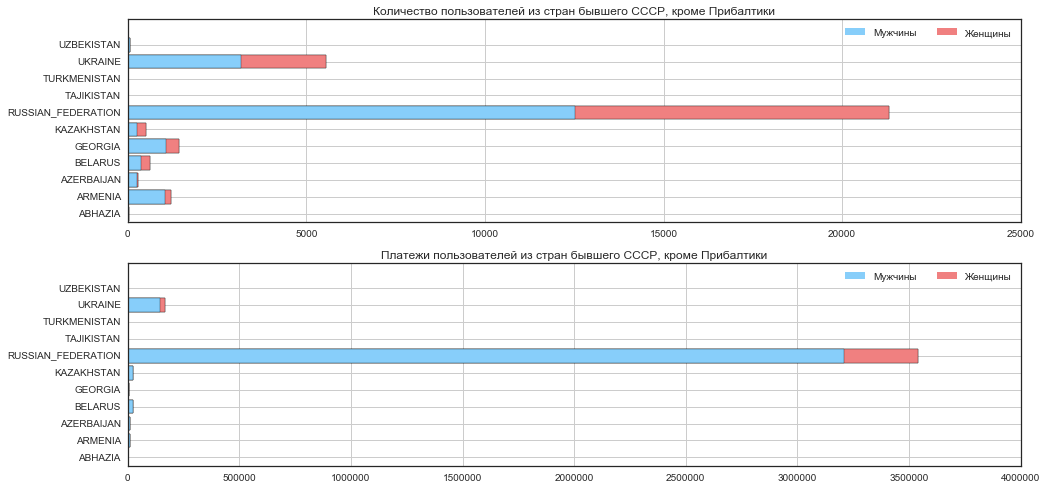

In [9]:
plt.figure(figsize(16,8))

plt.subplot(2,1,1)
N = len(np.unique(dataFromFormerUSSR.values[:, -7]))
valTotal = dataFromFormerUSSR.groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))  
valMen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'] == 'male'].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
valWomen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
pos = np.arange(N)+.5    

plt.barh(pos,valTotal, align='center', color = "blue")
plt.barh(pos,valWomen, align='center', color = "lightcoral")
plt.barh(pos,valMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(formerUSSR))
plt.title(u'Количество пользователей из стран бывшего СССР, кроме Прибалтики')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

plt.subplot(2,1,2)
N = len(np.unique(dataFromFormerUSSR.values[:, -7]))
valSum = dataFromFormerUSSR.groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)  
valSumMen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'] == 'male'].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
valSumWomen = dataFromFormerUSSR[dataFromFormerUSSR[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
pos = np.arange(N)+.5    

plt.barh(pos,valSum, align='center')
plt.barh(pos,valSumWomen, align='center', color = "lightcoral")
plt.barh(pos,valSumMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(formerUSSR))
plt.title(u'Платежи пользователей из стран бывшего СССР, кроме Прибалтики')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

In [10]:
print 'Количество пользователей из стран Бывшего СССР, кроме Прибалтики, в течении всего периода:', len(dataFromFormerUSSR)
print 'Платежи, осуществленные пользователями из стран Бывшего СССР, кроме Прибалтики, в течении всего периода, руб.:', int(sum(dataFromFormerUSSR[[u'Всего платежей (руб.)']]))

Количество пользователей из стран Бывшего СССР, кроме Прибалтики, в течении всего периода: 31050
Платежи, осуществленные пользователями из стран Бывшего СССР, кроме Прибалтики, в течении всего периода, руб.: 3782345


In [11]:
goldBillion = [u'AUSTRALIA', u'AUSTRIA', u'BELGIUM', u'CANADA', u'CYPRUS', u'CZECH_REPUBLIC', u'ESTONIA', u'FINLAND', u'FRANCE', u'GERMANY', u'GREECE', u'GREENLAND',u'HUNGARY', u'ICELAND',u'IRELAND', u'ISLE_OF_MAN', u'ISRAEL', u'ITALY',u'JAPAN', u'JERSEY',u'LATVIA', u'LITHUANIA', u'LUXEMBOURG',u'MONACO', u'MONTENEGRO', u'NETHERLANDS', u'NETHERLANDS_ANTILLES', u'NEW_ZEALAND', u'NORWAY', u'POLAND', u'PORTUGAL', u'ROMANIA',u'SPAIN', u'SWEDEN', u'SWITZERLAND', u'UNITED_KINGDOM', u'UNITED_STATES']
dataFromGoldBillion = data[data[u'Страна'].isin(goldBillion)]

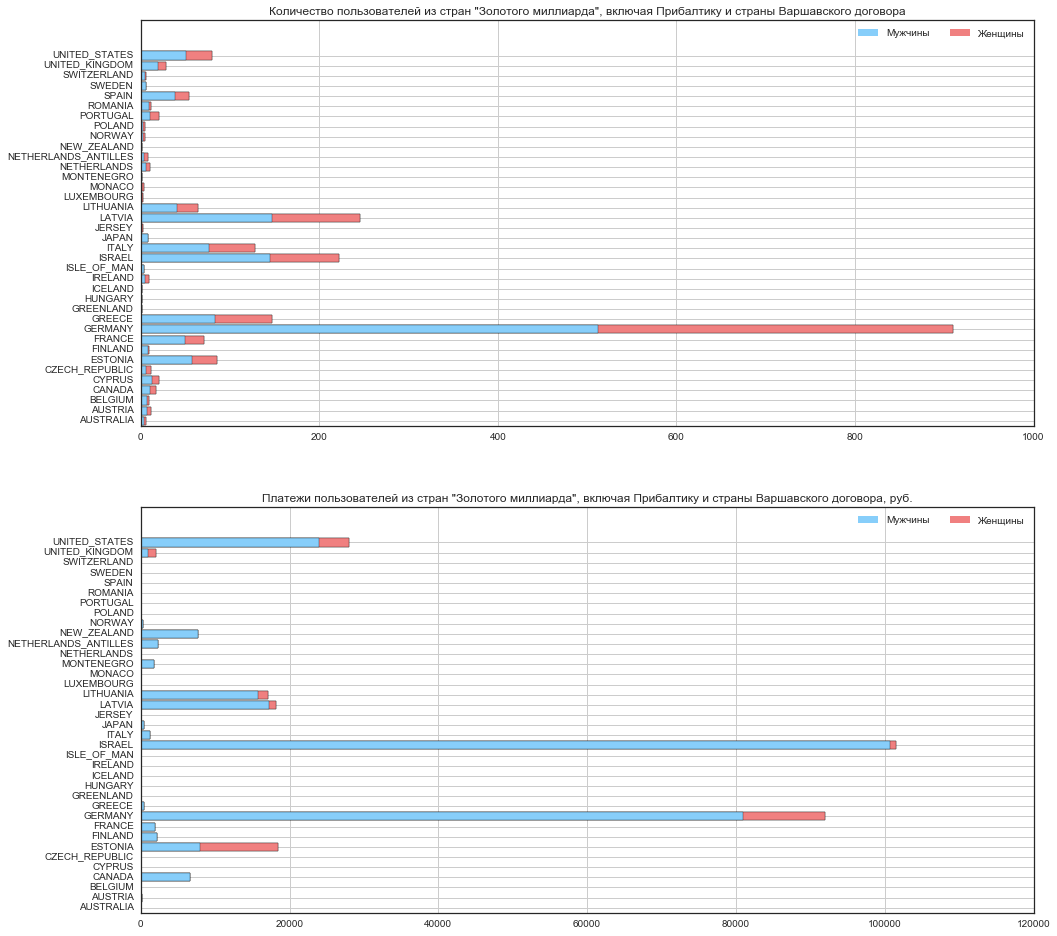

In [12]:
plt.figure(figsize(16,16))

plt.subplot(2,1,1)
N = len(np.unique(dataFromGoldBillion.values[:, -7]))
valTotal = dataFromGoldBillion.groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))  
valMen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'] == 'male'].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
valWomen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Страна'].agg(lambda x: len(x))
pos = np.arange(N)+.5    

plt.barh(pos,valTotal, align='center', color = "blue")
plt.barh(pos,valWomen, align='center', color = "lightcoral")
plt.barh(pos,valMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(goldBillion))
plt.title(u'Количество пользователей из стран "Золотого миллиарда", включая Прибалтику и страны Варшавского договора')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

plt.subplot(2,1,2)
N = len(np.unique(dataFromGoldBillion.values[:, -7]))
valSum = dataFromGoldBillion.groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)  
valSumMen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'] == 'male'].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
valSumWomen = dataFromGoldBillion[dataFromGoldBillion[u'Пол'].isin(['male', 'female'])].groupby(u'Страна')[u'Всего платежей (руб.)'].agg(np.sum)
pos = np.arange(N)+.5    

plt.barh(pos,valSum, align='center', color = "blue")
plt.barh(pos,valSumWomen, align='center', color = "lightcoral")
plt.barh(pos,valSumMen, align='center', color = "lightskyblue")
plt.yticks(pos, sorted(goldBillion))
plt.title(u'Платежи пользователей из стран "Золотого миллиарда", включая Прибалтику и страны Варшавского договора, руб.')
plt.legend([bar1, bar2], [u'Мужчины', u'Женщины'], loc=1, ncol = 2, prop={'size':10})
plt.grid(True)

In [16]:
print 'Количество пользователей из стран "Золотого миллиарда", включая Прибалтику и страны Варшавского договора, в течении всего периода:', len(dataFromGoldBillion)
print 'Платежи, осуществленные пользователями из стран "Золотого миллиарда", включая Прибалтику и страны Варшавского договора, в течении всего периода, руб.:', int(sum(dataFromGoldBillion[[u'Всего платежей (руб.)']]))

Количество пользователей из стран "Золотого миллиарда", включая Прибалтику и страны Варшавского договора, в течении всего периода: 2230
Платежи, осуществленные пользователями из стран "Золотого миллиарда", включая Прибалтику и страны Варшавского договора, в течении всего периода, руб.: 302645


In [21]:
otherCountries = list(set(np.unique(data.values[:, -7])) - set(formerUSSR + goldBillion))
dataFromOtherCountries = data[data[u'Страна'].isin(otherCountries)]
print 'Количество пользователей из прочих стран, в течении всего периода:', len(dataFromOtherCountries)
print 'Платежи, осуществленные пользователями из прочих стран, в течении всего периода, руб.:', int(sum(dataFromOtherCountries[[u'Всего платежей (руб.)']]))

Количество пользователей из прочих стран, в течении всего периода: 583
Платежи, осуществленные пользователями из прочих стран, в течении всего периода, руб.: 33636


<script type="text/javascript">
    $('div.input').hide();
</script>

<style>
div.prompt {display:none}
</style>